# Exploratory Data Analysis using a sample Superstore Data 

Objective:
*   Perform Exploratory Data Analysis on dataset 'SampleSuperstore'
*   Finding out the weak areas where we can work to make more profit





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.shape

(9994, 13)

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# Number of unique values in each column
for i in df.columns:
  print(i,len(df[i].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


In [11]:
# Checking for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There is no null or missing data

## Data Visualization

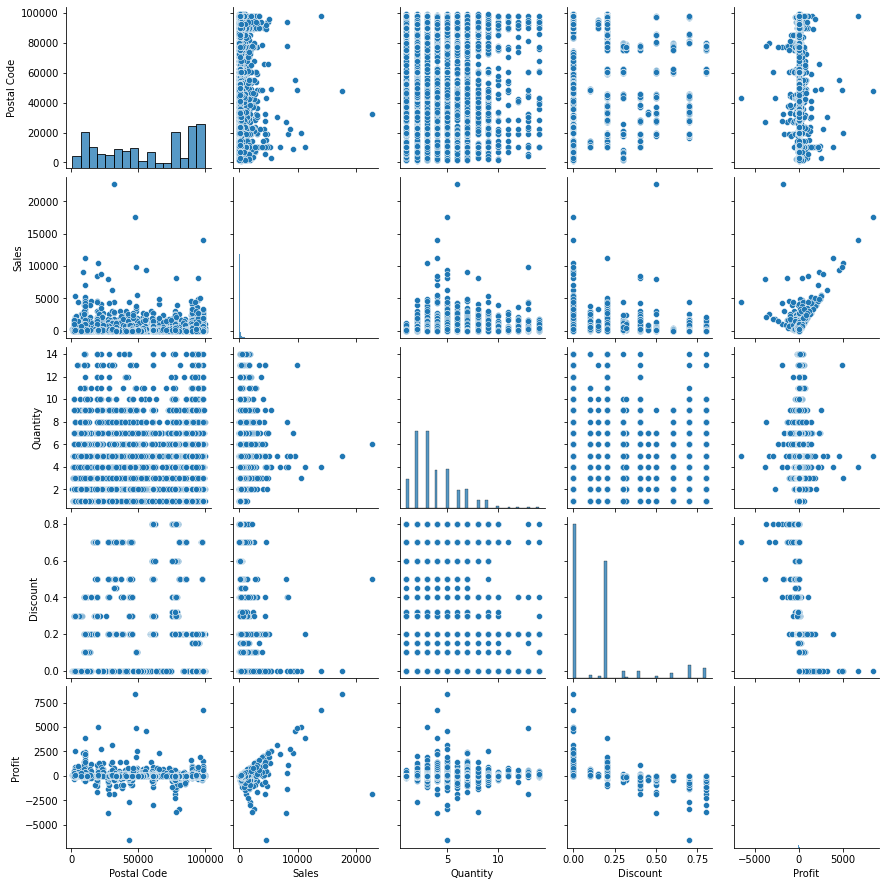

In [12]:
#Plotting pairwise relation in dataset
sns.pairplot(df)

<function matplotlib.pyplot.show>

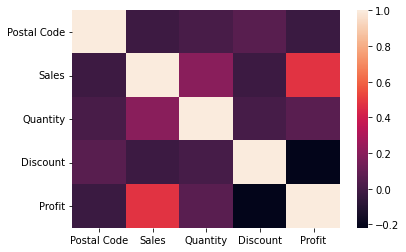

In [13]:
# Using heatmap to visualize correlation between columns
sns.heatmap(df.corr())
plt.show

*   Here we can see profit and sales has correlation of about 60%. Sales and Profit are moderately correlated.
*   Discount and Profit are negatively correlated.
*   Quantity and Profit are less moderately correlated





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

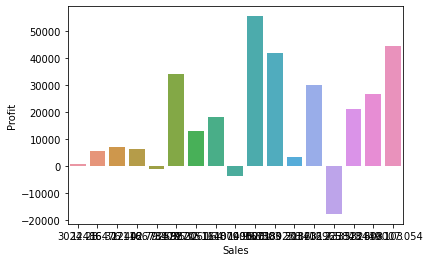

In [28]:
# Total Profit vs Sales

sns.barplot(data=df.groupby('Sub-Category')['Sales','Profit'].agg(sum),x='Sales',y='Profit')
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


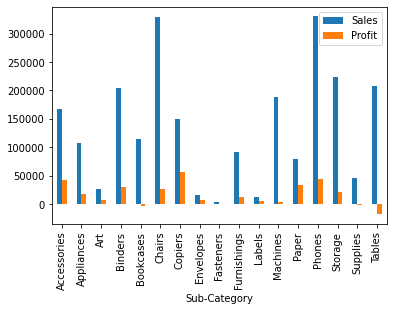

In [29]:
df.groupby('Sub-Category')['Sales','Profit'].agg(sum).plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<function matplotlib.pyplot.show>

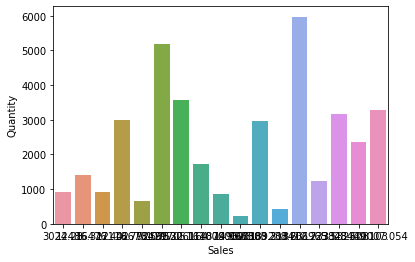

In [30]:
#Total Sales vs Quantity
sns.barplot(data=df.groupby('Sub-Category')['Sales','Quantity'].agg(sum),x='Sales',y='Quantity')
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


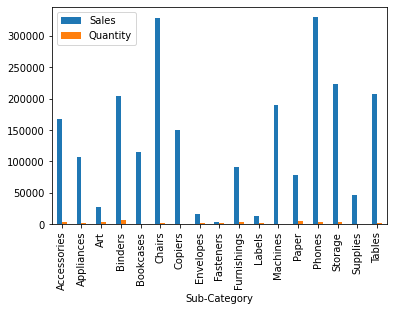

In [31]:
df.groupby('Sub-Category')['Sales','Quantity'].agg(sum).plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


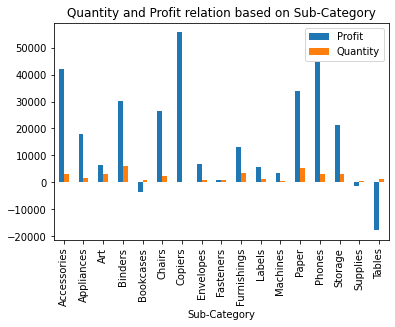

In [33]:
# Quantity and Profit relation based on Sub-Category
df.groupby('Sub-Category')['Profit','Quantity'].agg(sum).plot(kind='bar')
plt.title('Quantity and Profit relation based on Sub-Category')
plt.show()

In Sub-Category the loss is maximum for Tables followed by Bookcases

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Text(0.5, 1.0, 'Discount and Profit relation based on Sub-Category')

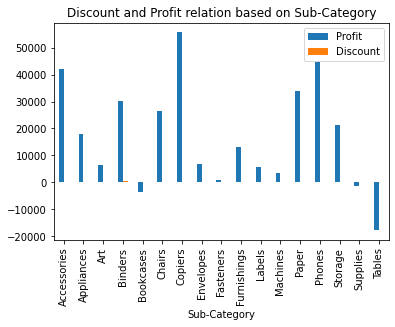

In [34]:
# Discount and Profit relation based on Sub-Category
df.groupby('Sub-Category')['Profit','Discount'].agg(sum).plot(kind='bar')
plt.title('Discount and Profit relation based on Sub-Category')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

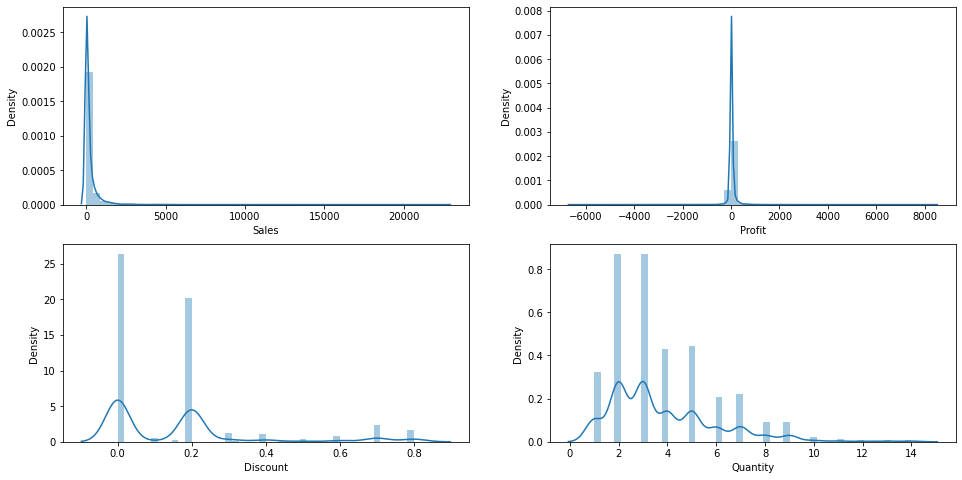

In [36]:
# Distribution plot of various features which shows the variation in data distribution
fig,axes=plt.subplots(2,2,figsize=(16,8))
sns.distplot(df['Sales'],ax=axes[0,0])
sns.distplot(df['Profit'],ax=axes[0,1])
sns.distplot(df['Discount'],ax=axes[1,0])
sns.distplot(df['Quantity'],ax=axes[1,1])

The distribution plot of sales is positively skewed.
Distribution plot of profit is normally distributed.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


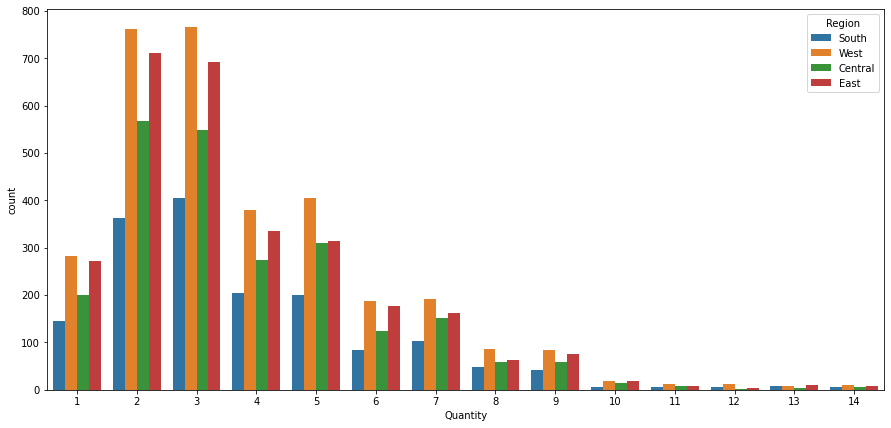

In [39]:
# Count plot of Quantity based on different regions
plt.figure(figsize=(15,7))
sns.countplot(df['Quantity'],hue=df['Region'])

Quantity of 3 is maximum followed by 2.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

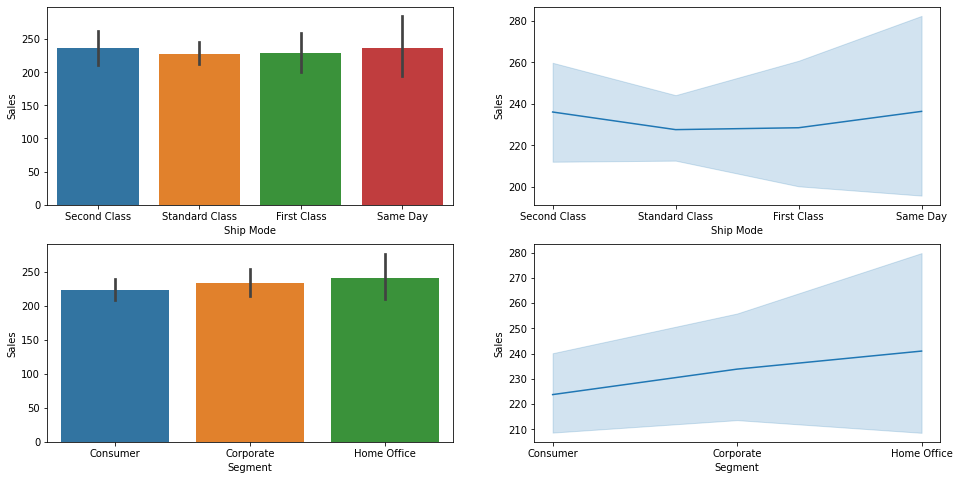

In [41]:
# Sales with different shipping modes
fig,axes=plt.subplots(2,2,figsize=(16,8))
sns.barplot(df['Ship Mode'],df['Sales'],ax=axes[0,0])
sns.lineplot(df['Ship Mode'],df['Sales'],ax=axes[0,1])
sns.barplot(df['Segment'],df['Sales'],ax=axes[1,0])
sns.lineplot(df['Segment'],df['Sales'],ax=axes[1,1])


## Important Findings
*   The features Profit and Discount are negatively correlated
*   Over less quantity of products too the sales were high.
*   The max quantity of product in demand was in range 2-4.
*   Mode of shipping doesnot affect much to the sales.
*   Home office provides highest sales followed by Corporate.







